# Fill in Missing Time Series Data (Hackerrank)

A time series of daily readings of mercury levels in a river is provided to you. In each test case, the day's highest level is missing for certain days. By analyzing the data, try to identity the missing mercury levels for those days. Each row of data contains two tab-separated values: a time-stamp and the day's highest reading.

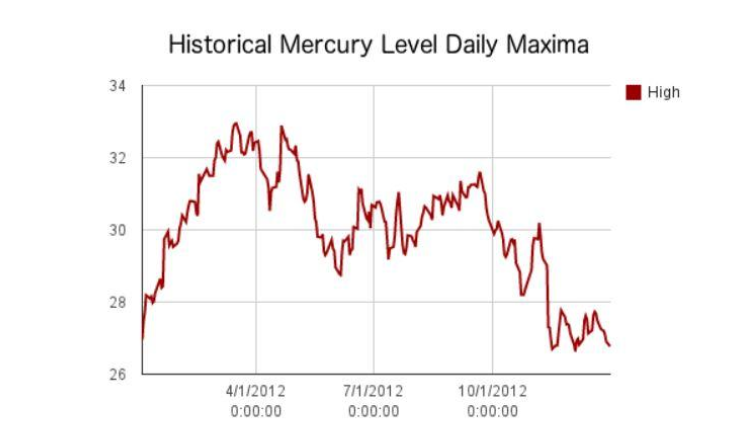

In [53]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="screenshot_graph.png", width=500)

There are __exactly twenty__ rows marked missing in each input file. The missing values are marked missing in each input file. The missing values are marked as "Missing_1", "Missing_2", ..., "Missing_20". These missing records have been randomly dispersed in the rows of data.

### Function Description
Complete the *calcMissing* function in the editor below. It should print 20 rows (see `output000.txt` as an example), one for each missing value, as floats.

### Constraints
Mercury levels are all < 400.

### Input Format for Custom Testing
The first line contains an integer *n*, the number of rows of data to follow.

Each of the next *n* lines contains a string of data in the format described.

### Sample Case 0

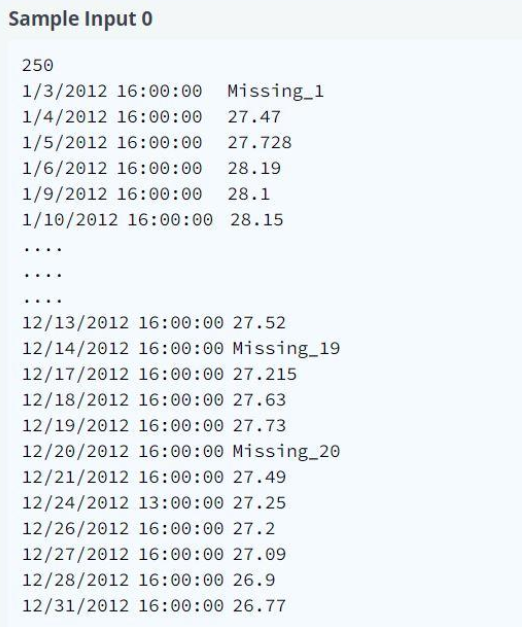

In [55]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="screenshot_sample-input.png", width=400)

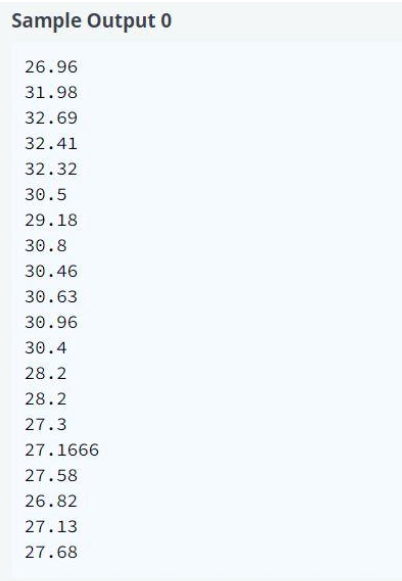

In [60]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="screenshot_sample-output.png", width=300)

### Scoring
We will compute the mean of the magnitude of the percentage difference by comparing your expected answers with the actual mercury level high for each of the missing records (in all tests cases - samples included).

For all missing values we calculate:

1. d = $\sum | (expected\_value[i] - compared\_value[i]) / (expected\_value[i]) | * 100 $

2. Then we take the average of d

3. d = d / (number of missing values)

<br>

Your final score on a scale of 100 will be: 50 * max( (2 - d), 0 )

That is, if the mean value of d exceeds 2% (your predictions are off by 2% or more on average), you will score a zero. If your predictions are all right on target, you will score 100.

If your program throws an error (or an incorrect output format) for a single test case, the overall score assigned will be zero.

### Starting Code

*NOTE: On this local environment, I treated the inputs as a file read rather than a command line read*

```python

#!/bin/python

import math
import os
import random
import re
import sys


#
# Complete the 'calcMissing' function below.
#

# The function accepts STRING_ARRAY readings as parameter.
#

def calcMissing(readings):

    # Write your code here



if __name__ == '__main__':

    readings_count = int(raw_input().strip())

    readings = []

    for _ in xrange(readings_count):

        readings_item = raw_input()

        readings.append(readings_item)


    calcMissing(readings)

```

<hr>
<hr>

Pandas `interpolate()` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html?highlight=interpolate#pandas.DataFrame.interpolate)

In [62]:
#!/bin/python3

import math
import os
import random
import re
import sys

import pandas as pd
import numpy as np


#
# Complete the 'calcMissing' function below.
#
# The function accepts STRING_ARRAY readings as parameter.
#


def calcMissing(readings):

    # Convert input to pandas DataFrame
    datadf = pd.DataFrame(readings, columns=["Date", "Time", "Reading"])

    # Find the indexes of all the readings that contain "Missing..."
    missing_index = datadf.loc[datadf['Reading'].str.contains("Missing.+$", regex=True)].index.values

    # Fill in "Missing_..." with NaN, convert to numeric data type, then fill in those NaN values with interpolate() using a linear method
    datadf['Reading'].iloc[missing_index] = np.NaN
    datadf['Reading']  = datadf['Reading'].apply(pd.to_numeric)
    datadf['Reading'] = datadf['Reading'].interpolate(method="linear")


    print(datadf['Reading'].iloc[missing_index].to_string(index=False))
    
    



if __name__ == '__main__':
    
    file_name = 'input000.txt'
    readings = []


    readings_file = open(file_name)

    for line in readings_file:
        line = line.rstrip()
        line = line.split()
        readings.append(line)



    calcMissing(readings)


32.540000
32.120000
32.405000
29.380000
29.196667
28.973333
30.320000
29.840000
29.590000
30.990000
31.230000
31.400000
29.696667
29.473333
29.530000
28.950000
29.782500
28.150000
26.885000
27.375000
